# Pymaceuticals Inc.
---

### Analysis

- 1) Looking at the bar charts, Capomulin and Ramicane had the most observations, while Propriva had the least.
- 2) Looking at the pie charts, it seems that more males were observed than females. 
- 3) The box plots show that the final tumor volumes were lower for Capomulin and Ramicane than they were for Infubinol and Ceftamin.
- 4) Looking at mouse b128 data results, Capomulin seems to have been very affective in reducing the tumor volume in the mouse. 
- 5) There is a strong correlation between the weight and average tumor volume for the Capomulin regimen, and it shows a positive linear regression.
 

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single DataFrame
mouseResultsDF = pd.merge(study_results,mouse_metadata, on="Mouse ID", how="left")

# Display the data table for preview
mouseResultsDF.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.0,0,Capomulin,Female,9,22
1,f932,0,45.0,0,Ketapril,Male,15,29
2,g107,0,45.0,0,Ketapril,Female,2,29
3,a457,0,45.0,0,Ketapril,Female,11,30
4,c819,0,45.0,0,Ketapril,Male,21,25


In [2]:
# Checking the number of mice.
mouseCount = len(mouseResultsDF["Mouse ID"].unique())
mouseCount

249

In [3]:
# Our data should be uniquely identified by Mouse ID and Timepoint
# Get the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
mouseResultsDF[mouseResultsDF[["Mouse ID", "Timepoint"]].duplicated(keep=False)]


,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
107,g989,0,45.000000,0,Propriva,Female,21,26
137,g989,0,45.000000,0,Propriva,Female,21,26
329,g989,5,48.786801,0,Propriva,Female,21,26
360,g989,5,47.570392,0,Propriva,Female,21,26
620,g989,10,51.745156,0,Propriva,Female,21,26
681,g989,10,49.880528,0,Propriva,Female,21,26
815,g989,15,51.325852,1,Propriva,Female,21,26
869,g989,15,53.442020,0,Propriva,Female,21,26
950,g989,20,55.326122,1,Propriva,Female,21,26
1111,g989,20,54.657650,1,Propriva,Female,21,26


In [4]:
# Optional: Get all the data for the duplicate mouse ID. 
mouseResultsDF.loc[mouseResultsDF["Mouse ID"] == "g989"]

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
107,g989,0,45.000000,0,Propriva,Female,21,26
137,g989,0,45.000000,0,Propriva,Female,21,26
329,g989,5,48.786801,0,Propriva,Female,21,26
360,g989,5,47.570392,0,Propriva,Female,21,26
620,g989,10,51.745156,0,Propriva,Female,21,26
681,g989,10,49.880528,0,Propriva,Female,21,26
815,g989,15,51.325852,1,Propriva,Female,21,26
869,g989,15,53.442020,0,Propriva,Female,21,26
950,g989,20,55.326122,1,Propriva,Female,21,26
1111,g989,20,54.657650,1,Propriva,Female,21,26


In [5]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
mouseResultsDF = mouseResultsDF.loc[mouseResultsDF["Mouse ID"] != "g989"]
mouseResultsDF.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.0,0,Capomulin,Female,9,22
1,f932,0,45.0,0,Ketapril,Male,15,29
2,g107,0,45.0,0,Ketapril,Female,2,29
3,a457,0,45.0,0,Ketapril,Female,11,30
4,c819,0,45.0,0,Ketapril,Male,21,25


In [6]:
# Checking the number of mice in the clean DataFrame.
mouseCount = len(mouseResultsDF["Mouse ID"].unique())
mouseCount

248

## Summary Statistics

In [7]:
mouseResultsDF.dtypes

Mouse ID               object
Timepoint               int64
Tumor Volume (mm3)    float64
Metastatic Sites        int64
Drug Regimen           object
Sex                    object
Age_months              int64
Weight (g)              int64
dtype: object

In [8]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 

groupedDF = mouseResultsDF.groupby(["Drug Regimen"])
volumeMean = groupedDF["Tumor Volume (mm3)"].mean()
volumeMedian = groupedDF["Tumor Volume (mm3)"].median()
volumeVar = groupedDF["Tumor Volume (mm3)"].var()
volumeStd = groupedDF["Tumor Volume (mm3)"].std()
volumeSEM = groupedDF["Tumor Volume (mm3)"].sem()

# Assemble the resulting series into a single summary DataFrame.

summaryStatsDF = pd.DataFrame(
    {
        "Mean Tumor Volume": (volumeMean),
        "Median Tumor Volume": (volumeMedian),
        "Tumor Volume Variance": (volumeVar),
        "Tumor Volume Std. Dev.": (volumeStd),
        "Tumor Volume Std. Err.": (volumeSEM)
    }
)

summaryStatsDF

,Mean Tumor Volume,Median Tumor Volume,Tumor Volume Variance,Tumor Volume Std. Dev.,Tumor Volume Std. Err.
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [45]:
# A more advanced method to generate a summary statistics table of mean, median, variance, standard deviation,
# and SEM of the tumor volume for each regimen (only one method is required in the solution)

# Using the aggregation method, produce the same summary statistics in a single line


## Bar and Pie Charts

In [9]:
plotDF = pd.DataFrame(groupedDF["Mouse ID"].count())
plotDF = plotDF.sort_values("Mouse ID", ascending=False)
plotDF = plotDF.rename(columns={"Mouse ID": "# of Observed Mouse Timepoints"})
plotDF

,# of Observed Mouse Timepoints
Drug Regimen,
Capomulin,230
Ramicane,228
Ketapril,188
Naftisol,186
Zoniferol,182
Placebo,181
Stelasyn,181
Ceftamin,178
Infubinol,178


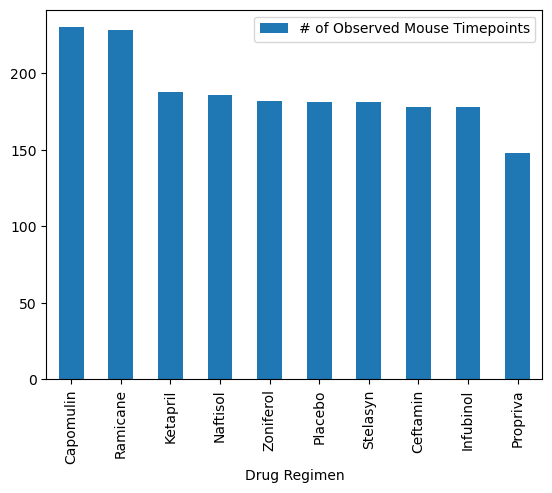

In [10]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using Pandas.
plotDF.plot(kind="bar")
plt.show()

In [11]:
drugRegCount = groupedDF["Mouse ID"].count()
drugRegCount = drugRegCount.sort_values(ascending=False)

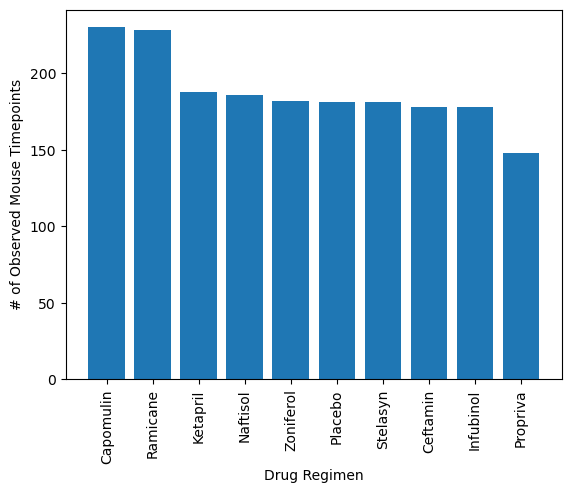

In [12]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using pyplot.
plt.bar(drugRegCount.index,drugRegCount,align="center")
plt.xticks(rotation="vertical")
plt.xlabel("Drug Regimen")
plt.ylabel("# of Observed Mouse Timepoints")
plt.show()

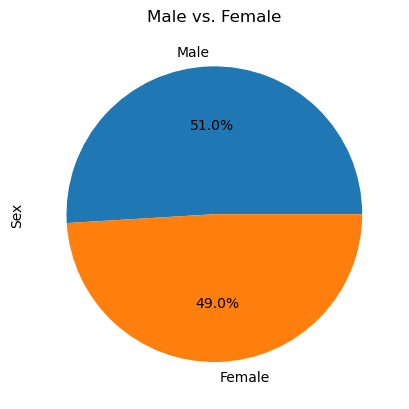

In [13]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas
piePlot = mouseResultsDF["Sex"].value_counts()
piePlot.plot(kind="pie",y="Sex",title="Male vs. Female",autopct="%1.1f%%",ylabel="Sex")
plt.show()

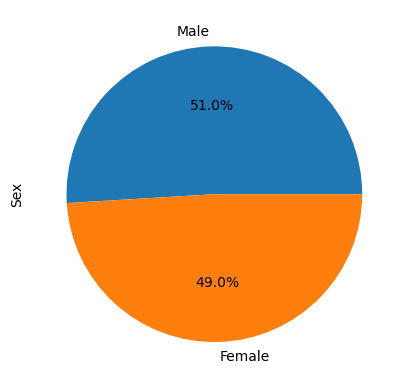

In [14]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
plt.pie(piePlot, labels=piePlot.index, autopct="%1.1f%%")
plt.ylabel("Sex")
plt.show()

## Quartiles, Outliers and Boxplots

In [22]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin
# Start by getting the last (greatest) timepoint for each mouse
maxTime = mouseResultsDF.groupby("Mouse ID")["Timepoint"].max()
maxTimeDF = maxTime.reset_index()

# Merge this group df with the original DataFrame to get the tumor volume at the last timepoint
mergedData = maxTimeDF.merge(mouseResultsDF, on=["Mouse ID", "Timepoint"], how="left")
mergedData.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,a203,45,67.973419,2,Infubinol,Female,20,23
1,a251,45,65.525743,1,Infubinol,Female,21,25
2,a262,45,70.717621,4,Placebo,Female,17,29
3,a275,45,62.999356,3,Ceftamin,Female,20,28
4,a366,30,63.440686,1,Stelasyn,Female,16,29


In [23]:
# Put treatments into a list for for loop (and later for plot labels)
treatmentList = ["Capomulin", "Ramicane", "Infubinol", "Ceftamin"]

# Create empty list to fill with tumor vol data (for plotting)
tumorVolList = []

# Calculate the IQR and quantitatively determine if there are any potential outliers. 
for treatment in treatmentList:
        
    # Locate the rows which contain mice on each drug and get the tumor volumes
    lastTumorVol = mergedData.loc[mergedData["Drug Regimen"] == treatment, "Tumor Volume (mm3)"]
    
    # add subset 
    tumorVolList.append(lastTumorVol)
    
    # Determine outliers using upper and lower bounds
    quartiles = lastTumorVol.quantile([0.25,0.5,0.75])
    lowerq = quartiles[0.25]
    upperq = quartiles[0.75]
    iqr = upperq - lowerq
    lowerBound = lowerq - (1.5*iqr)
    upperBound = upperq + (1.5*iqr)
    outliers = lastTumorVol.loc[(lastTumorVol < lowerBound) | (lastTumorVol > upperBound)]
    
    if len(outliers) == 0:
        print(f"{treatment}'s potential outliers: None")
    else:
        output = f"{treatment}'s potential outliers: "
        for o in outliers:
            output += f"{o} "
        print(output)

Capomulin's potential outliers: None
Ramicane's potential outliers: None
Infubinol's potential outliers: 36.3213458
Ceftamin's potential outliers: None


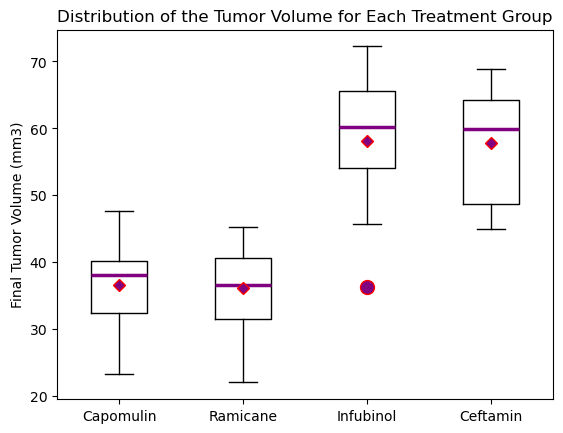

In [27]:
# Generate a box plot that shows the distrubution of the tumor volume for each treatment group.
flierprops = dict(marker='o',markerfacecolor='purple',markersize=10, markeredgecolor="red") #customize the outliers
medianprops = dict(linestyle='-', linewidth=2.5, color='purple') #customize the median line
meanpointprops = dict(marker='D',markeredgecolor='red', markerfacecolor="purple") #customize the mean points

plt.boxplot(tumorVolList, labels=treatmentList, flierprops=flierprops, medianprops=medianprops,
            meanprops=meanpointprops,showmeans=True)
plt.title("Distribution of the Tumor Volume for Each Treatment Group")
plt.ylabel("Final Tumor Volume (mm3)")
plt.show()

## Line and Scatter Plots

In [28]:
mouseResultsDF.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.0,0,Capomulin,Female,9,22
1,f932,0,45.0,0,Ketapril,Male,15,29
2,g107,0,45.0,0,Ketapril,Female,2,29
3,a457,0,45.0,0,Ketapril,Female,11,30
4,c819,0,45.0,0,Ketapril,Male,21,25


In [30]:
capomulinDF = mouseResultsDF.loc[mouseResultsDF["Drug Regimen"] == "Capomulin"]
capomulinDF.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.0,0,Capomulin,Female,9,22
226,j246,0,45.0,0,Capomulin,Female,21,21
227,r554,0,45.0,0,Capomulin,Female,8,17
228,s185,0,45.0,0,Capomulin,Female,3,17
229,b742,0,45.0,0,Capomulin,Male,7,21


In [32]:
b128Data = capomulinDF.loc[capomulinDF["Mouse ID"] == "b128"]
b128Data

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.000000,0,Capomulin,Female,9,22
472,b128,5,45.651331,0,Capomulin,Female,9,22
679,b128,10,43.270852,0,Capomulin,Female,9,22
719,b128,15,43.784893,0,Capomulin,Female,9,22
933,b128,20,42.731552,0,Capomulin,Female,9,22
1268,b128,25,43.262145,1,Capomulin,Female,9,22
1400,b128,30,40.605335,1,Capomulin,Female,9,22
1547,b128,35,37.967644,1,Capomulin,Female,9,22
1629,b128,40,38.379726,2,Capomulin,Female,9,22
1764,b128,45,38.982878,2,Capomulin,Female,9,22


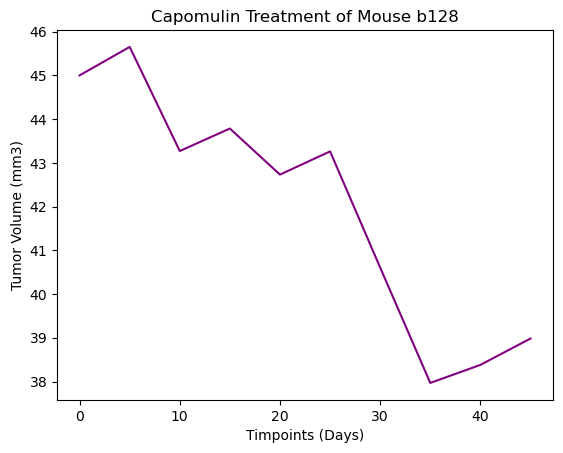

In [37]:
# Generate a line plot of tumor volume vs. time point for a single mouse treated with Capomulin
plt.plot(b128Data["Timepoint"],b128Data["Tumor Volume (mm3)"], color="purple")
plt.xlabel("Timpoints (Days)")
plt.ylabel("Tumor Volume (mm3)")
plt.title("Capomulin Treatment of Mouse b128")
plt.show()

In [40]:
scatterGroup = capomulinDF.groupby("Mouse ID")
avgTumorVol = scatterGroup["Tumor Volume (mm3)"].mean()
avgWeight = scatterGroup["Weight (g)"].mean()
scatterDF = pd.DataFrame({
    "Average Tumor Volume (mm3)": avgTumorVol,
    "Weight (g)": avgWeight
})
scatterDF

,Average Tumor Volume (mm3),Weight (g)
Mouse ID,,
b128,41.963636,22.0
b742,40.083699,21.0
f966,36.505973,17.0
g288,41.990097,19.0
g316,44.613344,22.0
i557,44.805810,24.0
i738,39.141053,20.0
j119,44.465236,23.0
j246,43.216925,21.0


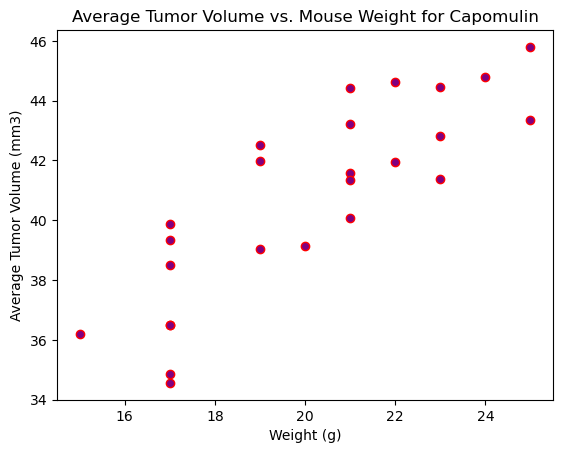

In [47]:
# Generate a scatter plot of mouse weight vs. the average observed tumor volume for the entire Capomulin regimen
plt.scatter(scatterDF["Weight (g)"],scatterDF["Average Tumor Volume (mm3)"],facecolor="purple", edgecolor="red", marker="o")
plt.xlabel("Weight (g)")
plt.ylabel("Average Tumor Volume (mm3)")
plt.title("Average Tumor Volume vs. Mouse Weight for Capomulin")
plt.show()

## Correlation and Regression

The correlation between mouse weight and the average tumor volume is 0.84


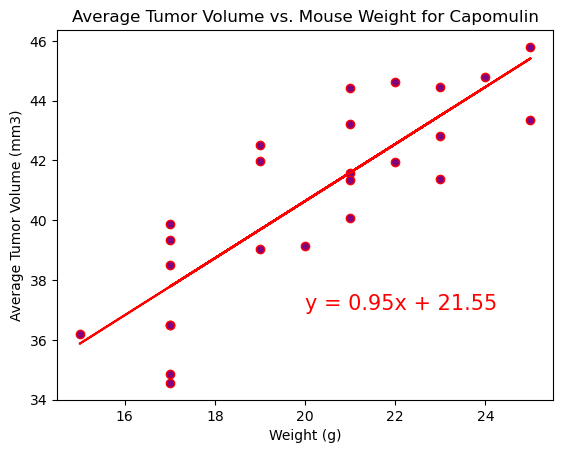

In [49]:
# Calculate the correlation coefficient and a linear regression model 
# for mouse weight and average observed tumor volume for the entire Capomulin regimen
tumorVol = scatterDF["Average Tumor Volume (mm3)"]
weight = scatterDF["Weight (g)"]
correlation = st.pearsonr(weight,tumorVol)
print(f"The correlation between mouse weight and the average tumor volume is {round(correlation[0],2)}")

#regression
(slope, intercept, rvalue, pvalue, stderr) = st.linregress(weight,tumorVol)
regressVals = weight * slope + intercept
lineEQ = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.scatter(weight,tumorVol,facecolor="purple", edgecolor="red", marker="o")
plt.plot(weight,regressVals,"r-")
plt.annotate(lineEQ,(20,37),fontsize=15,color="red")
plt.xlabel("Weight (g)")
plt.ylabel("Average Tumor Volume (mm3)")
plt.title("Average Tumor Volume vs. Mouse Weight for Capomulin")
plt.show()